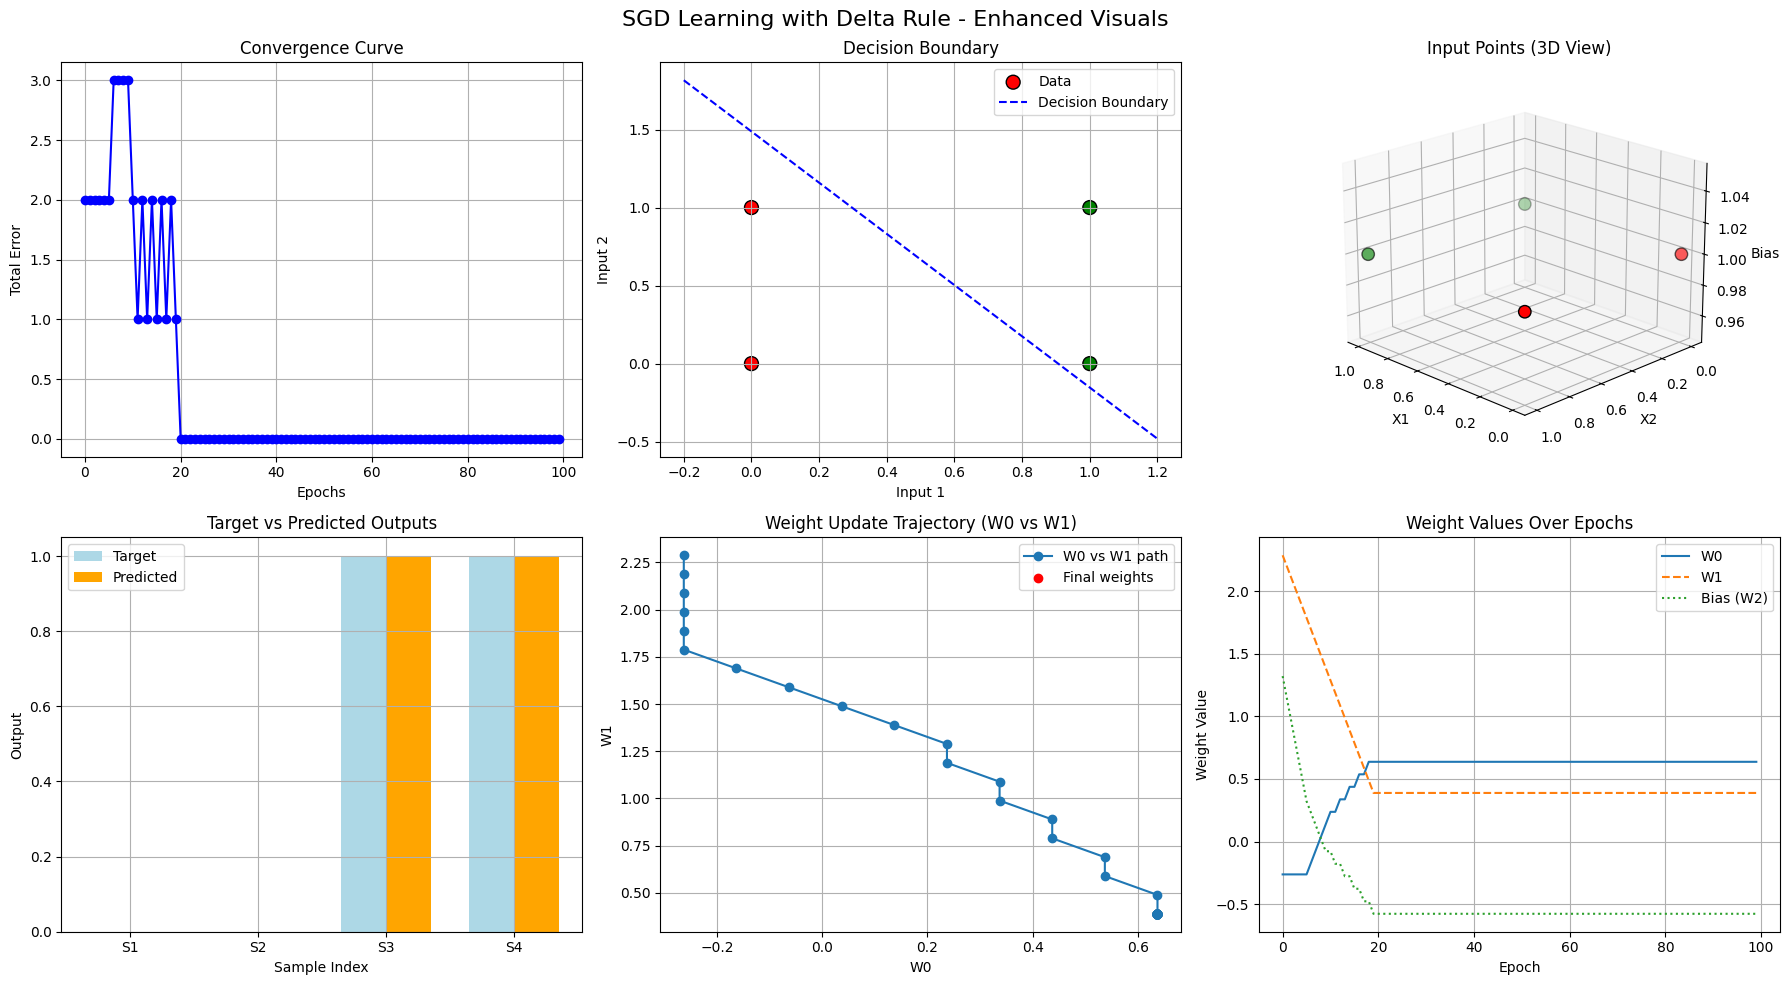

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dataset
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])  # Inputs with bias
D = np.array([0, 0, 1, 1])  # Targets

# Initialization
weights = np.random.randn(3)
lr = 0.1
epochs = 100
errors = []
weight_history = []

# Training loop (SGD)
for epoch in range(epochs):
    total_error = 0
    for i in range(X.shape[0]):
        x_i = X[i]
        target = D[i]
        y = np.dot(weights, x_i)
        output = 1 if y >= 0 else 0
        error = target - output
        weights += lr * error * x_i
        total_error += error ** 2
    weight_history.append(weights.copy())
    errors.append(total_error)

# Prediction after training
outputs = []
for x in X:
    y = np.dot(weights, x)
    outputs.append(1 if y >= 0 else 0)

# === PLOTS ===
fig = plt.figure(figsize=(18, 10))

# Plot 1: Convergence curve
plt.subplot(2, 3, 1)
plt.plot(errors, 'bo-')
plt.title("Convergence Curve")
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.grid(True)

# Plot 2: Decision boundary
plt.subplot(2, 3, 2)
colors = ['red' if label == 0 else 'green' for label in D]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='k', label='Data')
if weights[1] != 0:
    x_vals = np.linspace(-0.2, 1.2, 100)
    y_vals = -(weights[0]*x_vals + weights[2]) / weights[1]
    plt.plot(x_vals, y_vals, 'b--', label='Decision Boundary')
else:
    plt.axvline(-weights[2]/weights[0], color='blue', linestyle='--', label='Boundary')
plt.title("Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)

# Plot 3: 3D Input visualization
ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, s=80, edgecolor='k')
ax.set_title("Input Points (3D View)")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Bias")
ax.view_init(elev=20, azim=135)

# Plot 4: Prediction vs Target
plt.subplot(2, 3, 4)
bar_width = 0.35
index = np.arange(len(D))
plt.bar(index, D, bar_width, label='Target', color='lightblue')
plt.bar(index + bar_width, outputs, bar_width, label='Predicted', color='orange')
plt.title("Target vs Predicted Outputs")
plt.xlabel("Sample Index")
plt.ylabel("Output")
plt.xticks(index + bar_width / 2, ['S1', 'S2', 'S3', 'S4'])
plt.legend()
plt.grid(True)

# Plot 5: Weight trajectory (W0 vs W1)
plt.subplot(2, 3, 5)
weight_history = np.array(weight_history)
plt.plot(weight_history[:, 0], weight_history[:, 1], 'o-', label='W0 vs W1 path')
plt.scatter(weights[0], weights[1], color='red', label='Final weights')
plt.title("Weight Update Trajectory (W0 vs W1)")
plt.xlabel("W0")
plt.ylabel("W1")
plt.legend()
plt.grid(True)

# Plot 6: Weight values across epochs
plt.subplot(2, 3, 6)
plt.plot(weight_history[:, 0], label='W0', linestyle='-')
plt.plot(weight_history[:, 1], label='W1', linestyle='--')
plt.plot(weight_history[:, 2], label='Bias (W2)', linestyle=':')
plt.title("Weight Values Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True)

plt.suptitle("SGD Learning with Delta Rule - Enhanced Visuals", fontsize=16)
plt.tight_layout()
plt.show()
